# Анализ выручки ритейлера

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('testovoe.xlsx', sheet_name='Выгрузка')

In [3]:
# переименуем колонки первой строкой
data.columns = data.iloc[0]

In [4]:
# удалим первую строку
data = data.reindex(data.index.drop(0))

In [5]:
# удалим первый столбец
data = data.iloc[:,1:]

In [6]:
# удалим лишние пробелы в начале и конце строки в названиях колонок
data.columns = data.columns.str.strip()

In [7]:
data.columns = ['Период', 'Выручка', 'Сеансы на сайте', '1', 'Выдано промокодов', '2', 'Использованные промокоды', \
                'Транзакции', 'Отправлено коммуникаций', 'Показы рекламы']

In [8]:
data = data.drop(columns=['1', '2'], axis=1)

In [9]:
data.head()

,Период,Выручка,Сеансы на сайте,Выдано промокодов,Использованные промокоды,Транзакции,Отправлено коммуникаций,Показы рекламы
1,2021-01-31 00:00:00,173347977,7053919.08,3328819.0,33857.421990,57782.659,3676223,32806504
2,2021-02-28 00:00:00,189150482,7594019.28,3584401.0,35602.931340,63050.160667,5367402,32606504
3,2021-03-31 00:00:00,213301878,8532075.12,4345929.0,43371.381860,71100.626,6368838,47005287
4,2021-04-30 00:00:00,177837611,7113504.44,3358146.0,36160.314237,59279.203667,5411735,30324817
5,2021-05-31 00:00:00,160348018,6413920.72,3571052.0,32604.096993,53449.339333,4960615,30387197


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 1 to 31
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Период                    31 non-null     object 
 1   Выручка                   31 non-null     object 
 2   Сеансы на сайте           31 non-null     object 
 3   Выдано промокодов         31 non-null     float64
 4   Использованные промокоды  31 non-null     float64
 5   Транзакции                31 non-null     object 
 6   Отправлено коммуникаций   31 non-null     object 
 7   Показы рекламы            31 non-null     object 
dtypes: float64(2), object(6)
memory usage: 2.1+ KB


In [11]:
# смена типа данных на дату и время
data['Период'] = pd.to_datetime(data['Период'], format='%d.%m.%Y')

In [12]:
data[['Выручка', 'Сеансы на сайте', 'Транзакции', 'Отправлено коммуникаций', 'Показы рекламы']] = \
      data[['Выручка', 'Сеансы на сайте', 'Транзакции', 'Отправлено коммуникаций', 'Показы рекламы']].astype('float64')

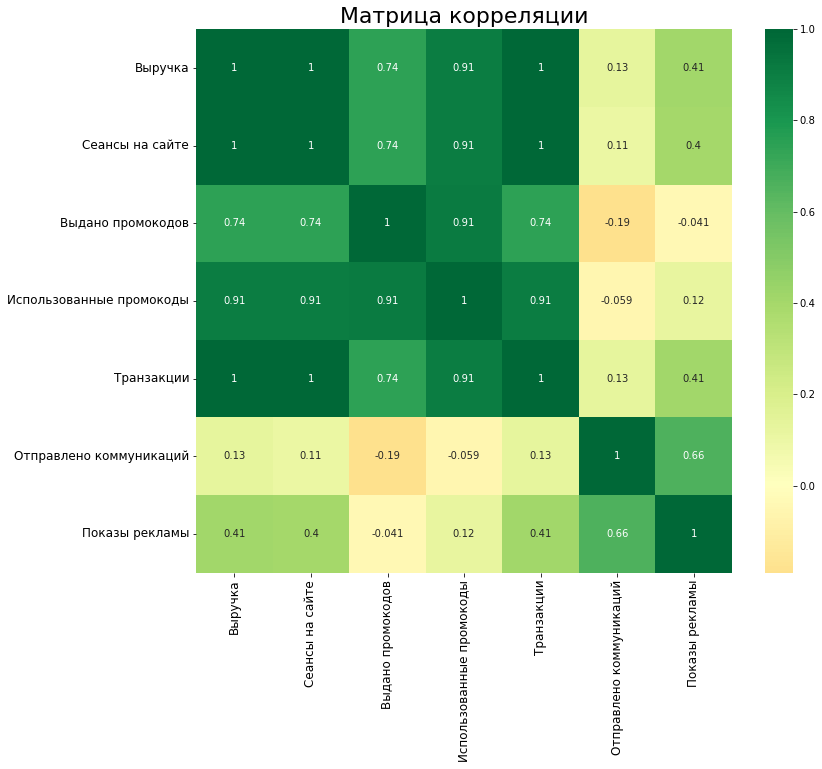

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, \
            cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

По матрице корреляций видим, что выручка зависит от сеансов на сайте, кол-ва использованных и выданных промокодов. А использованные промокоды напрямую зависят от выданных промокодов. Посмотрим динамику показателей.

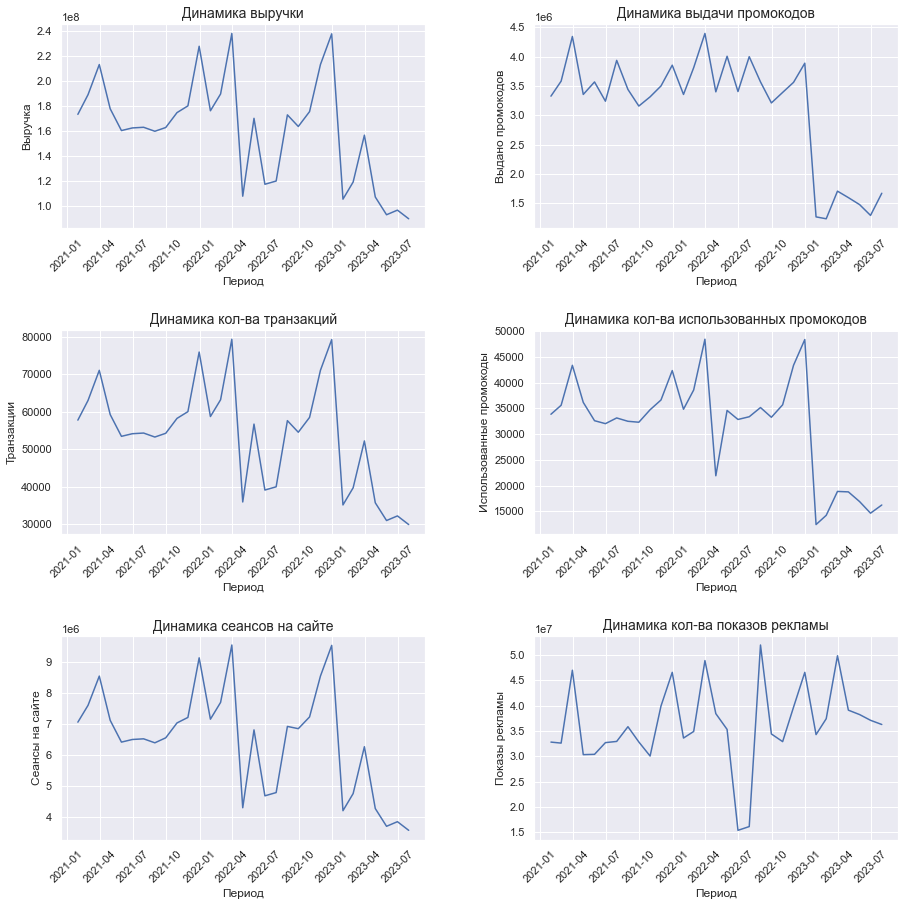

In [14]:
sns.set(rc={'figure.figsize':(15,15)})

plt.subplot (3, 2, 1)
sns.lineplot(data=data, x="Период", y="Выручка").set_title('Динамика выручки', fontsize=14)
plt.xticks(rotation=45)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot (3, 2, 3)
sns.lineplot(data=data, x="Период", y="Транзакции").set_title('Динамика кол-ва транзакций', fontsize=14)
plt.xticks(rotation=45)

plt.subplot (3, 2, 5)
sns.lineplot(data=data, x="Период", y="Сеансы на сайте").set_title('Динамика сеансов на сайте', fontsize=14)
plt.xticks(rotation=45)

plt.subplot (3, 2, 2)
sns.lineplot(data=data, x="Период", y="Выдано промокодов").set_title('Динамика выдачи промокодов', fontsize=14)
plt.xticks(rotation=45)

plt.subplot (3, 2, 4)
sns.lineplot(data=data, x="Период", y="Использованные промокоды").set_title('Динамика кол-ва использованных промокодов', \
                                                                            fontsize=14)
plt.xticks(rotation=45)

plt.subplot (3, 2, 6)
sns.lineplot(data=data, x="Период", y="Показы рекламы").set_title('Динамика кол-ва показов рекламы', fontsize=14)
plt.xticks(rotation=45)
plt.show()

1. В первый раз выручка упала в апреле 2022 года. Кол-во выданных промокодов не изменилось, а количество использованных промокодов и сеансов на сайте резко упало. Предполагаю, что в какой-то момент(-ы) был технический сбой с работой сайта.
2. Второй спад выручки произошел в июле 2022 года. Кол-во посещений сайта и кол-во показов рекламы упали, показатели по промокодам не изменились. Значит в данный период времени была отключена/уменьшена рекламная компания, которая увеличивала трафик на сайт со сторонних ресурсов, и этот трафик приносил большую выручку компании.
3. В январе 2023 года резко упало количество выданных промокодов, что уменьшило кол-во использованных промокодов. В данный период времени большая часть пользователей приносила выручку благодаря промокодам.
4. В марте 2023 года немного увеличилось число выданных промокодов, и выручка немного выросла. Но с апреля опять виден упадок выдачи новых промокодов - и кол-во посещений сайта начало падать, а в связи с этим и выручка.

Вывод: обе рекламные компании (рекламные показы со ссылкой на сайт + выдача промокодов) работают хорошо. Но как только отключается/уменьшается одна из компаний - выручка резко падает.

# Анализ дашборда

Ошибки:
- выбор круговой диаграммы, ее лучше использовать, если категорий меньше 6. В данном случае категорий 7 - визуально выглядит плохо и непонятно
- цветовая палитра в круговой диаграмме: некоторые цвета плохо различимы между собой
- непонятный график с динамикой: Динамика чего? Как связаны кол-во и цена?
- две оси Y с разными шкалами на графиках с Динамикой и LTV vs CAC: трудно воспринимается
- слишком много фактоидов на верхней плашке

Улучшения:
- выбрать вместо круговой диаграммы горизонтальные бары или уменьшить кол-во секторов в круговой диаграмме, объединив несколько значений в один сектор
- в круговой диаграмме убрать легенду, подписать значения около секторов
- цвет в заголовках поярче/контрастнее
- использовать максимум 3 цвета для визуализации
- убрать тени и скругленные углы у плашек
- на графике со столбчатыми диаграммами подписать значения сверху баров
- для графика с Трафиком можно использовать обычную линейную диаграмму
- на всех графиках убрать слева и справа вертикальные подписи